Project aims: to explore watch data to improve consistency in daily movement. 
(Picked consistency because it's a simple way to improve substantially overall)

-Are there days/ months I'm consistently moving less?
-Is there any connection between my movement and my: steps? workouts? sleep?

Actionable goal: what simple adjustments can I make over a long term period to increase my movement?

How I got the data
-Health export app on iphone

What data am I using?
-Explain "Move": calories that come from active movement, including steps, stairs and workout exercise.

In [276]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime, time, timedelta

In [192]:
df = pd.read_csv('Oct_Aug_watch_data.csv')

df.head()

,Date,Active Calories (kcal),Cycling Distance (km),Exercise Minutes,Flights Climbed (floors),Resting Heart Rate (bpm),Sleep,Steps (steps),Workout Type,DURATION
0,03/10/2023,"1,226",-,2h 13m,25,60,-,"18,138",NaN,NaN
1,04/10/2023,"1,254",-,2h,19,53,2h 32m,"16,834",NaN,NaN
2,05/10/2023,"1,127",-,1h 37m,15,58,5h 56m,"15,883",NaN,NaN
3,06/10/2023,"1,150",-,1h 48m,22,56,7h 20m,"17,255",NaN,NaN
4,07/10/2023,538,-,30m,5,48,6h 12m,"6,746",NaN,NaN


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      375 non-null    object
 1   Active Calories (kcal)    316 non-null    object
 2   Cycling Distance (km)     316 non-null    object
 3   Exercise Minutes          316 non-null    object
 4   Flights Climbed (floors)  316 non-null    object
 5   Resting Heart Rate (bpm)  316 non-null    object
 6   Sleep                     316 non-null    object
 7   Steps (steps)             316 non-null    object
 8   Workout Type              159 non-null    object
 9    DURATION                 159 non-null    object
dtypes: object(10)
memory usage: 29.4+ KB


In [194]:
#Rename some columns to make them easier to work with. I use "Move" for Active Calories because that's what my watch calls it.

df.rename(columns = {"Active Calories (kcal)": "Move",
                     "Cycling Distance (km)": "Cycle Distance",
                     "Flights Climbed (floors)": "Flights Climbed",
                     "Resting Heart Rate (bpm)": "Resting HR",
                     "Steps (steps)": "Steps",
                     " DURATION": "Duration"},
          inplace = True)

#Move the Resting HR column to the right hand side

col = df.pop('Resting HR')
df.insert(9,'Resting HR',col)

In [195]:
df.head()

,Date,Move,Cycle Distance,Exercise Minutes,Flights Climbed,Sleep,Steps,Workout Type,Duration,Resting HR
0,03/10/2023,"1,226",-,2h 13m,25,-,"18,138",NaN,NaN,60
1,04/10/2023,"1,254",-,2h,19,2h 32m,"16,834",NaN,NaN,53
2,05/10/2023,"1,127",-,1h 37m,15,5h 56m,"15,883",NaN,NaN,58
3,06/10/2023,"1,150",-,1h 48m,22,7h 20m,"17,255",NaN,NaN,56
4,07/10/2023,538,-,30m,5,6h 12m,"6,746",NaN,NaN,48


In [196]:
type(df['Date'].iloc[0])

str

In [197]:
#Convert the date from a string to a datetime

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

#Separate into individual columns

df['Day of Week'] = df['Date'].apply(lambda time: time.dayofweek)
df['Month'] = df['Date'].apply(lambda time: time.month)
df['Year'] = df['Date'].apply(lambda time: time.year)

#Express the days of week in letters

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

#Rearrange the df so the dates all sit on the left hand side

col = df.pop('Day of Week')
df.insert(1,'Day of Week',col)

col = df.pop('Month')
df.insert(2,'Month',col)

col = df.pop('Year')
df.insert(3,'Year',col)

df.head()

,Date,Day of Week,Month,Year,Move,Cycle Distance,Exercise Minutes,Flights Climbed,Sleep,Steps,Workout Type,Duration,Resting HR
0,2023-10-03,Tue,10,2023,"1,226",-,2h 13m,25,-,"18,138",NaN,NaN,60
1,2023-10-04,Wed,10,2023,"1,254",-,2h,19,2h 32m,"16,834",NaN,NaN,53
2,2023-10-05,Thu,10,2023,"1,127",-,1h 37m,15,5h 56m,"15,883",NaN,NaN,58
3,2023-10-06,Fri,10,2023,"1,150",-,1h 48m,22,7h 20m,"17,255",NaN,NaN,56
4,2023-10-07,Sat,10,2023,538,-,30m,5,6h 12m,"6,746",NaN,NaN,48


Analysis part 1: working with the "Move" column

In [198]:
type(df['Move'].iloc[0])

str

In [199]:
df['Move'].isna().sum()

59

<Axes: >

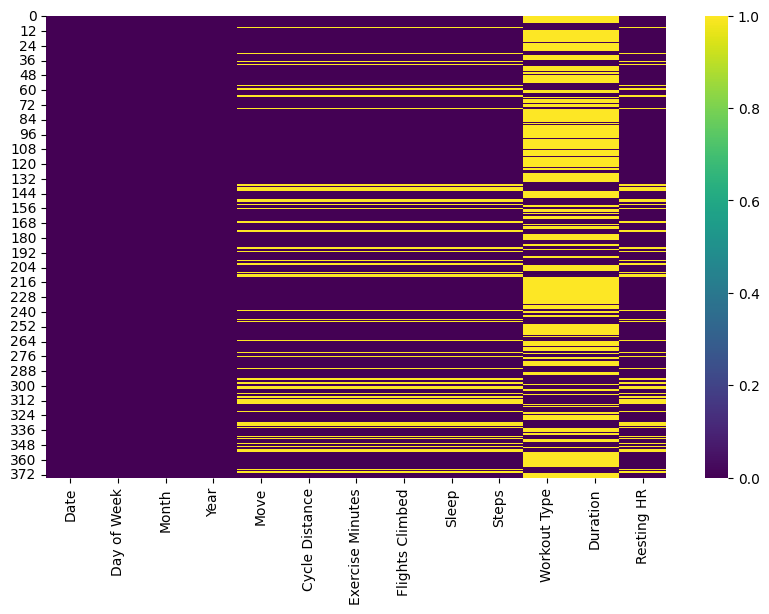

In [200]:
#to visualise the distribution of null values

plt.figure(figsize=(10,6))

sns.heatmap(df.isnull(), cmap='viridis')

In [201]:
#get rid of the comma from the numbers over 1,000

move = df['Move'].str.replace(',','')

#convert the data from an object to a float

move_numeric = pd.to_numeric(move, errors = 'coerce')

#fill in missing values with linear interpolation

df['Move'] = move_numeric.interpolate('linear')

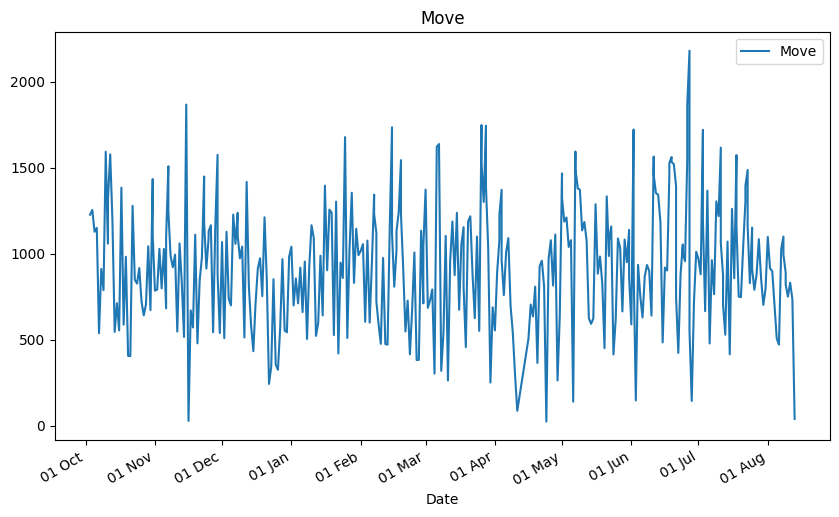

In [202]:
#to get a sense of what my variation in 'Move' looks like across the year

df.plot(x='Date', y='Move', title= 'Move', figsize=[10, 6])

dtFmt = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(dtFmt)

From this plot I can see there are many days where I move much more or much less than my average/target

In [203]:
df['Move'].mean()

943.5613333333333

My target 'move' goal is 750

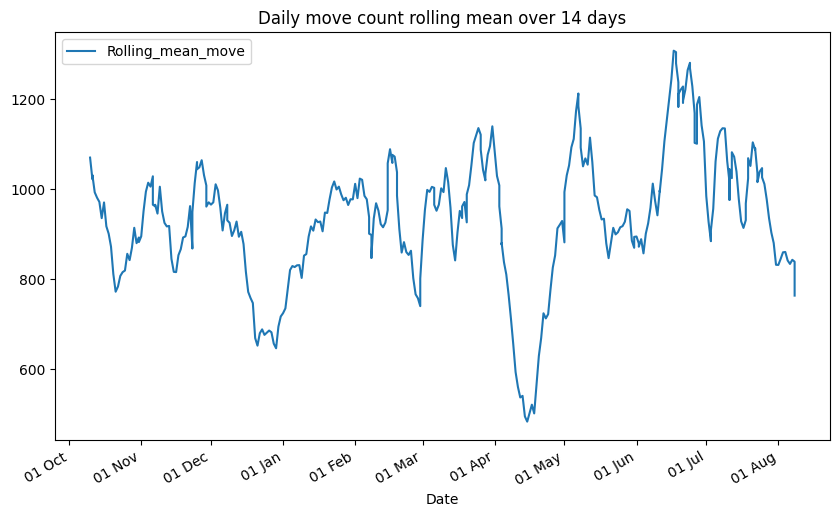

In [204]:
#to see if there are any sustained periods of variation

df['Rolling_mean_move'] = df['Move'].rolling(14,center=True).mean()

df.plot(x='Date', y='Rolling_mean_move', title= 'Daily move count rolling mean over 14 days', figsize=[10, 6])

dtFmt = mdates.DateFormatter('%d %b')
plt.gca().xaxis.set_major_formatter(dtFmt)

I am not surprised by the two big sustained dips- I know I move less over Christmas, and in mid-April I was sick for 5 days

Text(0.5, 1.0, 'Mean move by month')

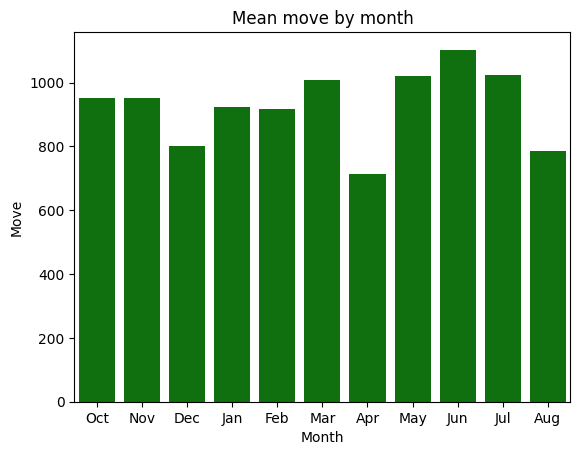

In [205]:
sns.barplot(df.groupby('Month')['Move'].mean(), 
            order = [10,11,12,1,2,3,4,5,6,7,8], 
            formatter = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',10:'Oct',11:'Nov',12:'Dec'},
           color = 'green')

plt.title('Mean move by month')

Text(0.5, 1.0, 'Mean move by day of week')

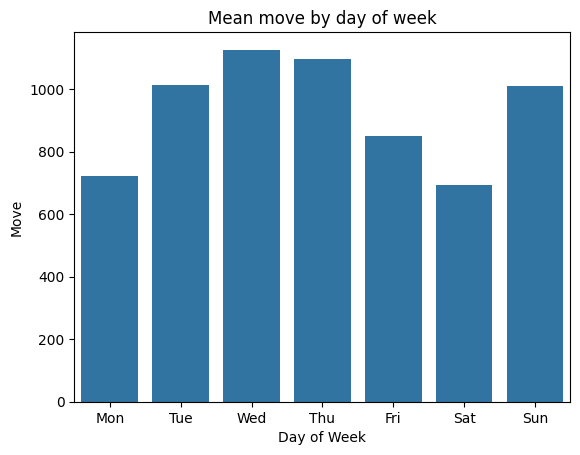

In [206]:
sns.barplot(df.groupby('Day of Week')['Move'].mean(), 
            order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.title('Mean move by day of week')

Useful to know that Mondays and Saturdays are substantially lower than the other days on average. And to a lesser extent Fridays. Mondays and Fridays I tend to work from home.

In [207]:
#Might be useful to have a distribution of days where my move is less than 500.

Text(0.5, 1.0, 'Distribution of daily move values')

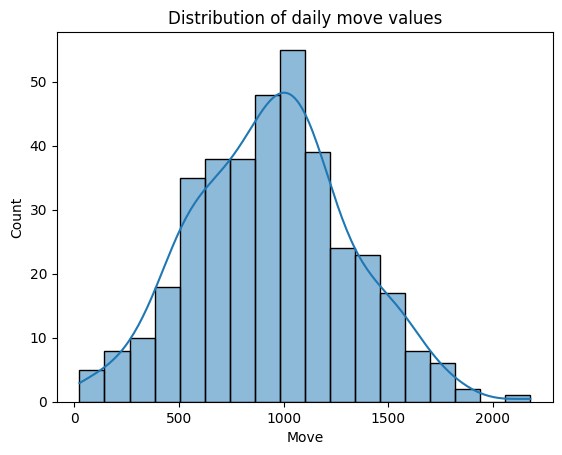

In [208]:
sns.histplot(df['Move'],bins =18, binwidth =120, kde =True)

#Calculated number of bins by doing sqrt of number of data points, rounding up. SQRT 316 = 17.8
#Bin width = range/number bins. Range = 2179 - 24 = 2155. 2155/18 = 119.7

plt.title('Distribution of daily move values')

I would love to work out how to cut down on the number of days I'm moving less than 500 kcal.

In [209]:
move_sub500 = df.loc[df['Move'] < 500]

Text(0.5, 1.0, 'Number of days with <500 move (by day of week)')

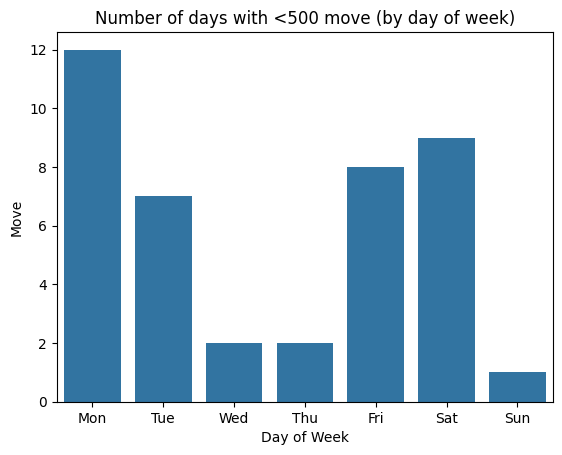

In [210]:
sns.barplot(move_sub500.groupby('Day of Week')['Move'].count(), 
            order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.title('Number of days with <500 move (by day of week)')

Text(0.5, 1.0, 'Number of days with <500 move (by month)')

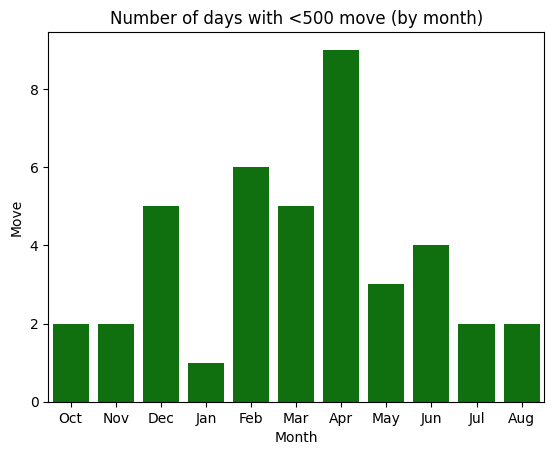

In [211]:
sns.barplot(move_sub500.groupby('Month')['Move'].count(), 
            order = [10,11,12,1,2,3,4,5,6,7,8], 
            formatter = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',10:'Oct',11:'Nov',12:'Dec'},
           color = 'green')

plt.title('Number of days with <500 move (by month)')

Further investigation: move by morning/ afternoon?

Analysis part 2: looking for factors that link to move count

In [212]:
# Starting with days where I do a workout

df.value_counts(df['Workout Type'])

Workout Type
Cycling                         110
Running                          24
Walking                          14
Functional Strength Training     10
Elliptical                        1
Name: count, dtype: int64

I know I don't often set my watch to record when I do walks or gym sessions, so I'll just work with cycling and running for now

In [230]:
#Selecting for the days where I do a running or cycling workout

run_cycle = df.loc[df['Workout Type'].str.contains('Cycling|Running', na = False)]

run_cycle.head()

,Date,Day of Week,Month,Year,Move,Cycle Distance,Exercise Minutes,Flights Climbed,Sleep,Steps,Workout Type,Duration,Resting HR,Rolling_mean_move
6,2023-10-09,Mon,10,2023,788.0,-,35m,18,6h 48m,"8,497",Running,20m,51,NaN
7,2023-10-10,Tue,10,2023,1592.0,-,2h 44m,29,7h 29m,"24,688",Running,23m,52,1070.535714
9,2023-10-11,Wed,10,2023,1317.5,NaN,NaN,NaN,NaN,NaN,Running,25m,NaN,1031.750000
10,2023-10-12,Thu,10,2023,1577.0,-,2h 28m,26,7h 39m,"21,901",Running,20m,59,993.178571
11,2023-10-13,Fri,10,2023,1192.0,-,1h 42m,24,8h 21m,"13,771",Running,20m,57,981.178571


In [214]:
type(df['Duration'].iloc[0])

float

In [216]:
string_deltatime = pd.to_timedelta(df['Duration'])

In [245]:
string_deltatime2 = string_deltatime.fillna(0)

In [290]:
string_deltatime3 = pd.to_timedelta(string_deltatime2)

In [298]:
df['Duration'] = string_deltatime3.apply(lambda x: x.total_seconds()/60)

In [302]:
df['Workout Type'].fillna('None', inplace = True)

In [308]:
df['Workout Type'] = df['Workout Type'].str.replace('Walking','None')

df['Workout Type'] = df['Workout Type'].str.replace('Elliptical','None')

df['Workout Type'] = df['Workout Type'].str.replace('Functional Strength Training','None')

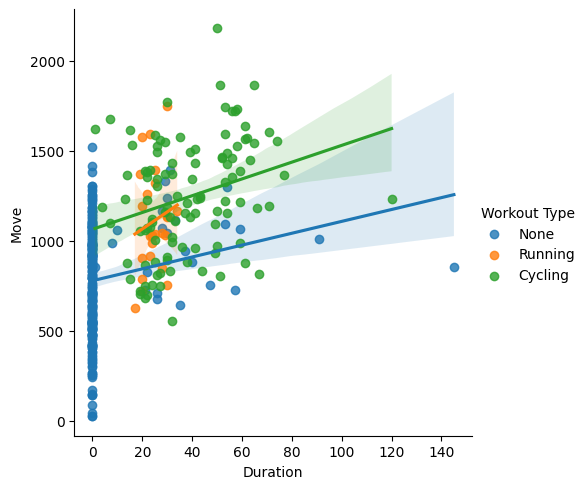

In [309]:
sns.lmplot(x= 'Duration',y='Move',hue= 'Workout Type', data=df)